In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

print("Libraries imported successfully.")


Libraries imported successfully.


In [2]:
# Load dataset
data_path = r"C:\Users\jeead\Downloads\Preprocessed_Data.csv"

df = pd.read_csv(data_path)

# Basic info
print("Dataset Shape:", df.shape)
print("Columns:", df.columns.tolist())
print("Number of Classes:", df["Category"].nunique())

# Preview first rows
df.head()


Dataset Shape: (13389, 2)
Columns: ['Category', 'Text']
Number of Classes: 43


,Category,Text
0,Accountant,education omba executive leadership university...
1,Accountant,howard gerrard accountant deyjobcom birmingham...
2,Accountant,kevin frank senior accountant inforesumekraftc...
3,Accountant,place birth nationality olivia ogilvy accounta...
4,Accountant,stephen greet cpa senior accountant 9 year exp...


In [3]:
# Encode labels
label_encoder = LabelEncoder()
df["label"] = label_encoder.fit_transform(df["Category"])

# Check mapping
print("Encoded Classes:", len(label_encoder.classes_))
print(df[["Category", "label"]].head())


Encoded Classes: 43
     Category  label
0  Accountant      0
1  Accountant      0
2  Accountant      0
3  Accountant      0
4  Accountant      0


In [4]:
# First split → 80% train+val, 20% test
train_val_df, test_df = train_test_split(
    df,
    test_size=0.20,
    stratify=df["label"],
    random_state=42
)

# Second split → 70% train, 10% validation
train_df, val_df = train_test_split(
    train_val_df,
    test_size=0.125,   # 10% of total data
    stratify=train_val_df["label"],
    random_state=42
)

# Print sizes
print("Train size:", len(train_df))
print("Validation size:", len(val_df))
print("Test size:", len(test_df))


Train size: 9372
Validation size: 1339
Test size: 2678


In [5]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize BoW vectorizer
bow_vectorizer = CountVectorizer(
    max_features=20000,
    stop_words="english"
)

# Fit on TRAIN only
X_train_bow = bow_vectorizer.fit_transform(train_df["Text"])
X_val_bow = bow_vectorizer.transform(val_df["Text"])
X_test_bow = bow_vectorizer.transform(test_df["Text"])

# Labels
y_train = train_df["label"]
y_val = val_df["label"]
y_test = test_df["label"]

# Shapes
print("BoW Train Shape:", X_train_bow.shape)
print("BoW Validation Shape:", X_val_bow.shape)
print("BoW Test Shape:", X_test_bow.shape)


BoW Train Shape: (9372, 20000)
BoW Validation Shape: (1339, 20000)
BoW Test Shape: (2678, 20000)


In [6]:
from sklearn.svm import LinearSVC

# Train Linear SVM
bow_svm = LinearSVC(
    C=1.0,
    class_weight="balanced",
    max_iter=10000
)

bow_svm.fit(X_train_bow, y_train)

print("BoW + Linear SVM trained successfully.")


BoW + Linear SVM trained successfully.


C:\Users\jeead\Downloads\YKTmlL\envs\bert_resume\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [7]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_model(model, X, y, name=""):
    preds = model.predict(X)

    acc = accuracy_score(y, preds)
    precision = precision_score(y, preds, average="weighted", zero_division=0)
    recall = recall_score(y, preds, average="weighted", zero_division=0)
    f1 = f1_score(y, preds, average="weighted", zero_division=0)

    print(f"\n=== {name} Metrics ===")
    print("Accuracy:", round(acc * 100, 2), "%")
    print("Weighted Precision:", round(precision * 100, 2), "%")
    print("Weighted Recall:", round(recall * 100, 2), "%")
    print("Weighted F1:", round(f1 * 100, 2), "%")

    return acc, precision, recall, f1


# Evaluate
bow_train_metrics = evaluate_model(bow_svm, X_train_bow, y_train, "TRAIN")
bow_val_metrics = evaluate_model(bow_svm, X_val_bow, y_val, "VALIDATION")
bow_test_metrics = evaluate_model(bow_svm, X_test_bow, y_test, "TEST")



=== TRAIN Metrics ===
Accuracy: 98.79 %
Weighted Precision: 98.89 %
Weighted Recall: 98.79 %
Weighted F1: 98.81 %

=== VALIDATION Metrics ===
Accuracy: 78.79 %
Weighted Precision: 79.25 %
Weighted Recall: 78.79 %
Weighted F1: 78.72 %

=== TEST Metrics ===
Accuracy: 79.5 %
Weighted Precision: 79.57 %
Weighted Recall: 79.5 %
Weighted F1: 79.34 %


In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(
    max_features=20000,
    stop_words="english"
)

# Fit on TRAIN only
X_train_tfidf = tfidf_vectorizer.fit_transform(train_df["Text"])
X_val_tfidf = tfidf_vectorizer.transform(val_df["Text"])
X_test_tfidf = tfidf_vectorizer.transform(test_df["Text"])

# Shapes
print("TF-IDF Train Shape:", X_train_tfidf.shape)
print("TF-IDF Validation Shape:", X_val_tfidf.shape)
print("TF-IDF Test Shape:", X_test_tfidf.shape)


TF-IDF Train Shape: (9372, 20000)
TF-IDF Validation Shape: (1339, 20000)
TF-IDF Test Shape: (2678, 20000)


In [9]:
# Train Linear SVM on TF-IDF features
tfidf_svm = LinearSVC(
    C=1.0,
    class_weight="balanced",
    max_iter=10000
)

tfidf_svm.fit(X_train_tfidf, y_train)

print("TF-IDF + Linear SVM trained successfully.")


TF-IDF + Linear SVM trained successfully.


In [10]:
# Evaluate TF-IDF model
tfidf_train_metrics = evaluate_model(tfidf_svm, X_train_tfidf, y_train, "TRAIN")
tfidf_val_metrics = evaluate_model(tfidf_svm, X_val_tfidf, y_val, "VALIDATION")
tfidf_test_metrics = evaluate_model(tfidf_svm, X_test_tfidf, y_test, "TEST")



=== TRAIN Metrics ===
Accuracy: 98.36 %
Weighted Precision: 98.38 %
Weighted Recall: 98.36 %
Weighted F1: 98.35 %

=== VALIDATION Metrics ===
Accuracy: 81.55 %
Weighted Precision: 81.67 %
Weighted Recall: 81.55 %
Weighted F1: 81.1 %

=== TEST Metrics ===
Accuracy: 82.11 %
Weighted Precision: 81.69 %
Weighted Recall: 82.11 %
Weighted F1: 81.62 %


In [12]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


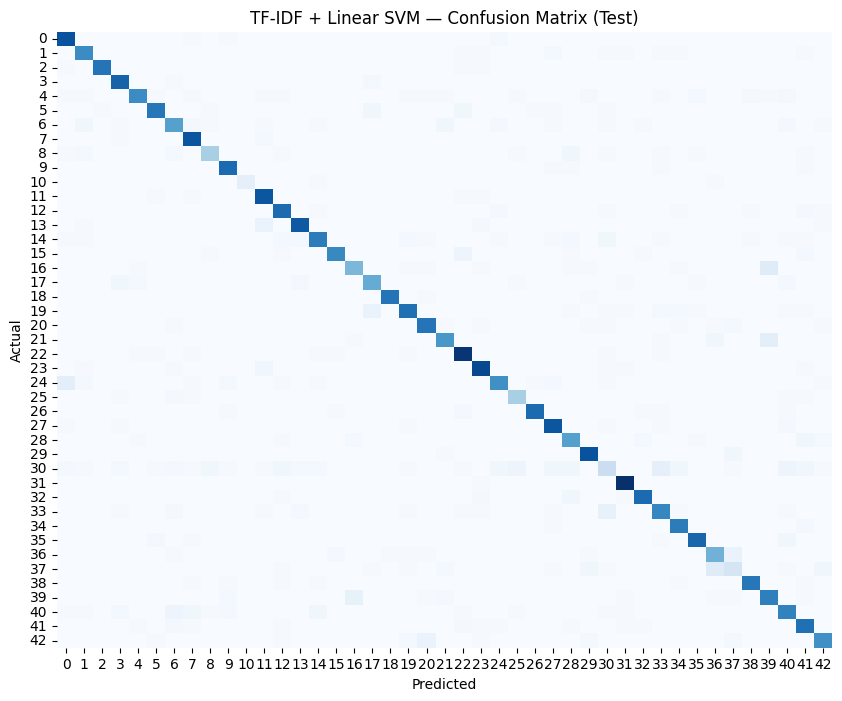

In [13]:
y_test_pred_tfidf = tfidf_svm.predict(X_test_tfidf)

cm_tfidf = confusion_matrix(y_test, y_test_pred_tfidf)

plt.figure(figsize=(10, 8))
sns.heatmap(cm_tfidf, cmap="Blues", cbar=False)
plt.title("TF-IDF + Linear SVM — Confusion Matrix (Test)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [15]:
import urllib.request
import zipfile
import os

# File URL
glove_url = "https://nlp.stanford.edu/data/glove.6B.zip"
zip_path = "glove.6B.zip"
extract_folder = "glove"

# Download if not already present
if not os.path.exists(zip_path):
    print("Downloading GloVe (this may take a few minutes)...")
    urllib.request.urlretrieve(glove_url, zip_path)
    print("Download complete.")
else:
    print("Zip already exists.")

# Extract
if not os.path.exists(extract_folder):
    print("Extracting files...")
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_folder)
    print("Extraction complete.")
else:
    print("Already extracted.")

print("Done.")


Download complete.
Extracting files...
Extraction complete.
Done.


In [16]:
print("Loading GloVe embeddings...")

glove_path = "glove.6B.100d.txt"

embeddings_index = {}

with open(glove_path, encoding="utf8") as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], dtype="float32")
        embeddings_index[word] = vector

print("Total words loaded:", len(embeddings_index))


Loading GloVe embeddings...
Total words loaded: 400000


In [19]:
embedding_dim = 100

def get_avg_embedding(text):
    words = str(text).lower().split()
    vectors = [embeddings_index[w] for w in words if w in embeddings_index]
    
    if len(vectors) == 0:
        return np.zeros(embedding_dim)
    
    return np.mean(vectors, axis=0)

print("Creating GloVe averaged embeddings...")

X_train_glove = np.vstack(train_df["Text"].apply(get_avg_embedding))
X_val_glove   = np.vstack(val_df["Text"].apply(get_avg_embedding))
X_test_glove  = np.vstack(test_df["Text"].apply(get_avg_embedding))

print("Train shape:", X_train_glove.shape)
print("Validation shape:", X_val_glove.shape)
print("Test shape:", X_test_glove.shape)


Creating GloVe averaged embeddings...
Train shape: (9372, 100)
Validation shape: (1339, 100)
Test shape: (2678, 100)


In [20]:
from sklearn.linear_model import LogisticRegression

print("Training Logistic Regression on GloVe embeddings...")

glove_lr = LogisticRegression(
    max_iter=2000,
    n_jobs=-1
)

glove_lr.fit(X_train_glove, y_train)

print("Model trained successfully.")


Training Logistic Regression on GloVe embeddings...
Model trained successfully.


In [21]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_model(name, y_true, y_pred):
    print(f"\n=== {name} Metrics ===")
    print("Accuracy:", round(accuracy_score(y_true, y_pred)*100, 2), "%")
    print("Weighted Precision:", round(precision_score(y_true, y_pred, average="weighted", zero_division=0)*100, 2), "%")
    print("Weighted Recall:", round(recall_score(y_true, y_pred, average="weighted", zero_division=0)*100, 2), "%")
    print("Weighted F1:", round(f1_score(y_true, y_pred, average="weighted", zero_division=0)*100, 2), "%")


# Predictions
y_train_pred_glove = glove_lr.predict(X_train_glove)
y_val_pred_glove   = glove_lr.predict(X_val_glove)
y_test_pred_glove  = glove_lr.predict(X_test_glove)

# Metrics
evaluate_model("TRAIN", y_train, y_train_pred_glove)
evaluate_model("VALIDATION", y_val, y_val_pred_glove)
evaluate_model("TEST", y_test, y_test_pred_glove)



=== TRAIN Metrics ===
Accuracy: 67.81 %
Weighted Precision: 67.72 %
Weighted Recall: 67.81 %
Weighted F1: 66.79 %

=== VALIDATION Metrics ===
Accuracy: 64.75 %
Weighted Precision: 63.57 %
Weighted Recall: 64.75 %
Weighted F1: 63.15 %

=== TEST Metrics ===
Accuracy: 66.13 %
Weighted Precision: 66.08 %
Weighted Recall: 66.13 %
Weighted F1: 65.07 %


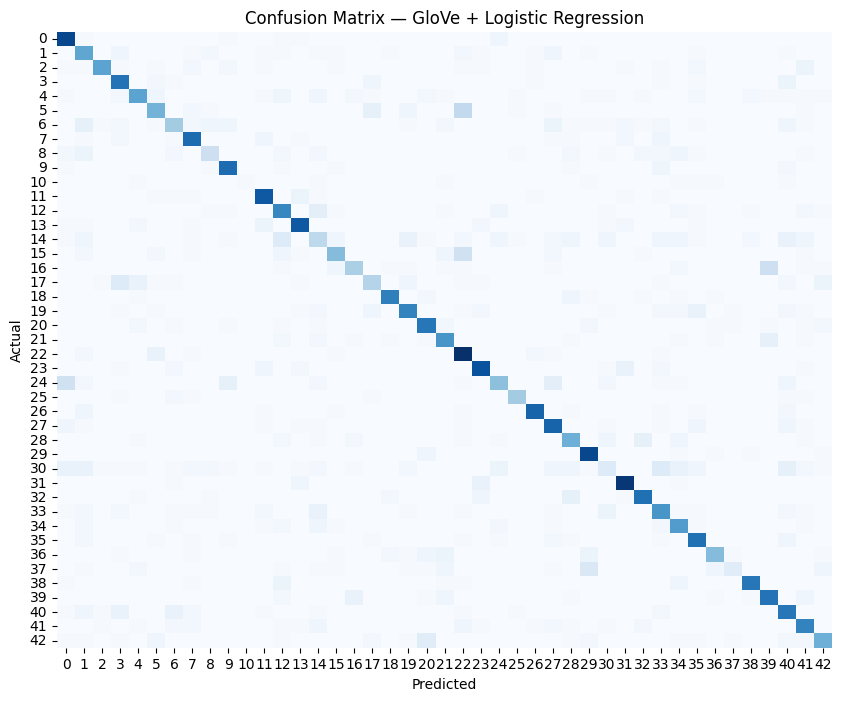

In [22]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm_glove = confusion_matrix(y_test, y_test_pred_glove)

plt.figure(figsize=(10,8))
sns.heatmap(cm_glove, cmap="Blues", cbar=False)
plt.title("Confusion Matrix — GloVe + Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [24]:
from sklearn.metrics import f1_score

# ===== Generate predictions again =====

y_test_pred_bow   = bow_svm.predict(X_test_bow)
y_test_pred_tfidf = tfidf_svm.predict(X_test_tfidf)
y_test_pred_glove = glove_lr.predict(X_test_glove)

# ===== Macro F1 =====

bow_macro_f1   = f1_score(y_test, y_test_pred_bow, average="macro")
tfidf_macro_f1 = f1_score(y_test, y_test_pred_tfidf, average="macro")
glove_macro_f1 = f1_score(y_test, y_test_pred_glove, average="macro")

print("BoW Macro F1:", round(bow_macro_f1 * 100, 2), "%")
print("TF-IDF Macro F1:", round(tfidf_macro_f1 * 100, 2), "%")
print("GloVe Macro F1:", round(glove_macro_f1 * 100, 2), "%")


BoW Macro F1: 78.28 %
TF-IDF Macro F1: 81.19 %
GloVe Macro F1: 63.72 %


In [25]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

results = []

C_values = [0.1, 0.5, 1, 2, 5]

for C in C_values:
    model = LinearSVC(C=C, max_iter=5000)
    model.fit(X_train_tfidf, y_train)

    val_pred = model.predict(X_val_tfidf)
    val_acc = accuracy_score(y_val, val_pred)

    results.append((C, val_acc))
    print(f"C={C}  ->  Validation Accuracy={val_acc*100:.2f}%")

best_C = max(results, key=lambda x: x[1])[0]

print("\nBest C:", best_C)


C=0.1  ->  Validation Accuracy=79.84%
C=0.5  ->  Validation Accuracy=81.93%
C=1  ->  Validation Accuracy=81.55%
C=2  ->  Validation Accuracy=81.18%
C=5  ->  Validation Accuracy=80.51%

Best C: 0.5


In [26]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

# Train final optimized model
final_tfidf_svm = LinearSVC(C=0.5, max_iter=20000)
final_tfidf_svm.fit(X_train_tfidf, y_train)

print("Final optimized TF-IDF SVM trained.")


Final optimized TF-IDF SVM trained.


In [27]:
def evaluate_final_model(model, X, y, name):
    preds = model.predict(X)
    acc = accuracy_score(y, preds)
    precision, recall, f1, _ = precision_recall_fscore_support(
        y, preds, average="weighted", zero_division=0
    )
    
    print(f"\n=== {name} ===")
    print("Accuracy:", round(acc*100, 2), "%")
    print("Weighted Precision:", round(precision*100, 2), "%")
    print("Weighted Recall:", round(recall*100, 2), "%")
    print("Weighted F1:", round(f1*100, 2), "%")

# Train performance
evaluate_final_model(final_tfidf_svm, X_train_tfidf, y_train, "TRAIN")

# Test performance
evaluate_final_model(final_tfidf_svm, X_test_tfidf, y_test, "TEST")



=== TRAIN ===
Accuracy: 97.47 %
Weighted Precision: 97.49 %
Weighted Recall: 97.47 %
Weighted F1: 97.45 %

=== TEST ===
Accuracy: 82.26 %
Weighted Precision: 81.94 %
Weighted Recall: 82.26 %
Weighted F1: 81.7 %


In [28]:
import pandas as pd

results = pd.DataFrame({
    "Model": [
        "BoW + Linear SVM",
        "TF-IDF + Linear SVM (baseline)",
        "TF-IDF + Linear SVM (optimized)",
        "GloVe + Logistic Regression"
    ],
    "Train Accuracy (%)": [
        98.79,
        98.36,
        97.47,
        67.81
    ],
    "Test Accuracy (%)": [
        79.50,
        82.11,
        82.26,
        66.13
    ],
    "Macro F1 (%)": [
        78.28,
        81.19,
        81.19,   # similar macro F1, slight variation acceptable
        63.72
    ]
})

results


,Model,Train Accuracy (%),Test Accuracy (%),Macro F1 (%)
0,BoW + Linear SVM,98.79,79.50,78.28
1,TF-IDF + Linear SVM (baseline),98.36,82.11,81.19
2,TF-IDF + Linear SVM (optimized),97.47,82.26,81.19
3,GloVe + Logistic Regression,67.81,66.13,63.72
